## Format 

In [9]:
import json
import pandas as pd
from typing import Dict, List, Set

PERSONA_FIELDS = [
    "general_decription",
    "brevity_style",
    "language_formality", 
    "narrative_voice",
    "vocabulary_range",
    "punctuation_style",
    "controversy_handling",
    "community_role",
    "content_triggers",
    "reaction_patterns",
    "message_effectiveness",
    "opinion_expression",
    "emotional_expression",
    "cognitive_patterns",
    "social_orientation",
    "conflict_approach",
    "value_signals",
    "identity_projection",
    "belief_expression",
    "stress_indicators",
    "adaptability_signs",
    "authenticity_markers"
]

def detect_persona_fields(post: Dict) -> Dict[str, bool]:
    """
    Detect which persona fields are present in a post's metadata
    """
    present_fields = {}
    
    for field in PERSONA_FIELDS:
        # Format the field name as it appears in the data
        field_key = f"persona_{field}"
        # Check if the field exists and has content
        field_value = post.get(field_key) or ""
        if isinstance(field_value, str):
            field_value = field_value.strip()
        present_fields[field_key] = bool(field_value)
    
    return present_fields

def process_eval_results(eval_results: List[Dict], generated_posts: List[Dict]) -> pd.DataFrame:
    # Create a list to store the processed data
    processed_data = []
    
    # Create a mapping of evaluation data by generation_id
    eval_mapping = {
        eval_item['metadata']['generated_id']: eval_item 
        for eval_item in eval_results  # Changed from eval_data.get('individual_evaluations', [])
    }
    
    # Process each generated post
    for post in generated_posts:
        generation_id = post['generation_id']
        
        # Get corresponding evaluation data
        eval_item = eval_mapping.get(generation_id, {})
        rouge_scores = eval_item.get('rouge_scores', {})
        
        # Create base row with evaluation metrics
        row = {
            'user_id': post['user_id'],
            'generation_id': generation_id,
            'original_post_id': post['original_post_id'],
            'original_text': post['original_text'],
            'stimulus': post['stimulus'],
            'generated_text': post['generated_text'],
            'similarity_scores': eval_item.get('similarity_scores', None),
            'rouge1_fmeasure': rouge_scores.get('rouge1', {}).get('fmeasure', None),
            'rouge1_recall': rouge_scores.get('rouge1', {}).get('recall', None),
            'rouge1_precision': rouge_scores.get('rouge1', {}).get('precision', None),
            'rouge2_fmeasure': rouge_scores.get('rouge2', {}).get('fmeasure', None),
            'rouge2_recall': rouge_scores.get('rouge2', {}).get('recall', None),
            'rouge2_precision': rouge_scores.get('rouge2', {}).get('precision', None),
            'rougel_fmeasure': rouge_scores.get('rougeL', {}).get('fmeasure', None),
            'rougel_recall': rouge_scores.get('rougeL', {}).get('recall', None),
            'rougel_precision': rouge_scores.get('rougeL', {}).get('precision', None),
        }
        
        # Add persona field detection results
        persona_fields = detect_persona_fields(post)
        row.update(persona_fields)
        
        processed_data.append(row)
    
    # Convert to DataFrame
    df = pd.DataFrame(processed_data)
    return df

if __name__ == "__main__":
    # Read the files
    with open('/Users/mogen/Desktop/Research_Case/fine_tune03/eval_results.json', 'r') as f:
        eval_results = json.load(f)
        eval_results = eval_results['individual_evaluations']
    
    with open('/Users/mogen/Desktop/Research_Case/fine_tune03/generated_posts.json', 'r') as f:
        posts_data = json.load(f)
        generated_posts = posts_data['generated_posts']
        
    # Process the data
    df = process_eval_results(eval_results, generated_posts)
    
    # Print persona field distribution
    persona_columns = [col for col in df.columns if col.startswith('persona_')]
    print("\nPersona Fields Distribution:")
    print(df[persona_columns].sum())
    
    # Save to CSV
    df.to_csv('/Users/mogen/Desktop/Research_Case/fine_tune03/8k_gpt4o_rnd_shuffled_personas.csv', index=False)


Persona Fields Distribution:
persona_general_decription       1838
persona_brevity_style            1762
persona_language_formality       1820
persona_narrative_voice          1822
persona_vocabulary_range         1772
persona_punctuation_style        1840
persona_controversy_handling     1842
persona_community_role           1750
persona_content_triggers         1738
persona_reaction_patterns        1866
persona_message_effectiveness    1836
persona_opinion_expression       1864
persona_emotional_expression     1816
persona_cognitive_patterns       1860
persona_social_orientation       1862
persona_conflict_approach        1820
persona_value_signals            1910
persona_identity_projection      1804
persona_belief_expression        1844
persona_stress_indicators        1736
persona_adaptability_signs       1788
persona_authenticity_markers     1810
dtype: int64


## ANALYZE

#### Import

In [2]:
!pip install seaborn  
!pip install matplotlib

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached matplotlib-3.10.0-cp312-cp312-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached contourpy-1.3.1-cp312-cp312-macosx_11_0_arm64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.55.8-cp312-cp312-macosx_10_13_universal2.whl.metadata (101 kB)
  Using cached kiwisolver-1.4.8-cp312-cp312-macosx_11_0_arm64.whl.metadata (6.2 kB)
  Using cached pillow-11.1.0-cp312-cp312-macosx_11_0_arm64.whl.metadata (9.1 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached matplotlib-3.10.0-cp312-cp312-macosx_11_0_arm64.whl (8.0 MB)
Using cached contourpy-1.3.1-cp312-cp312-macosx_11_0_arm64.whl (255 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.55.8-cp312-cp312-macosx_10_13_universal2.whl (2.7 MB)
Using cached kiwisolver-1.4.8-cp312-cp312-macosx_11_0_arm64.whl (65 kB)
Using cached pillow-11.1.0-cp312-cp312-macosx

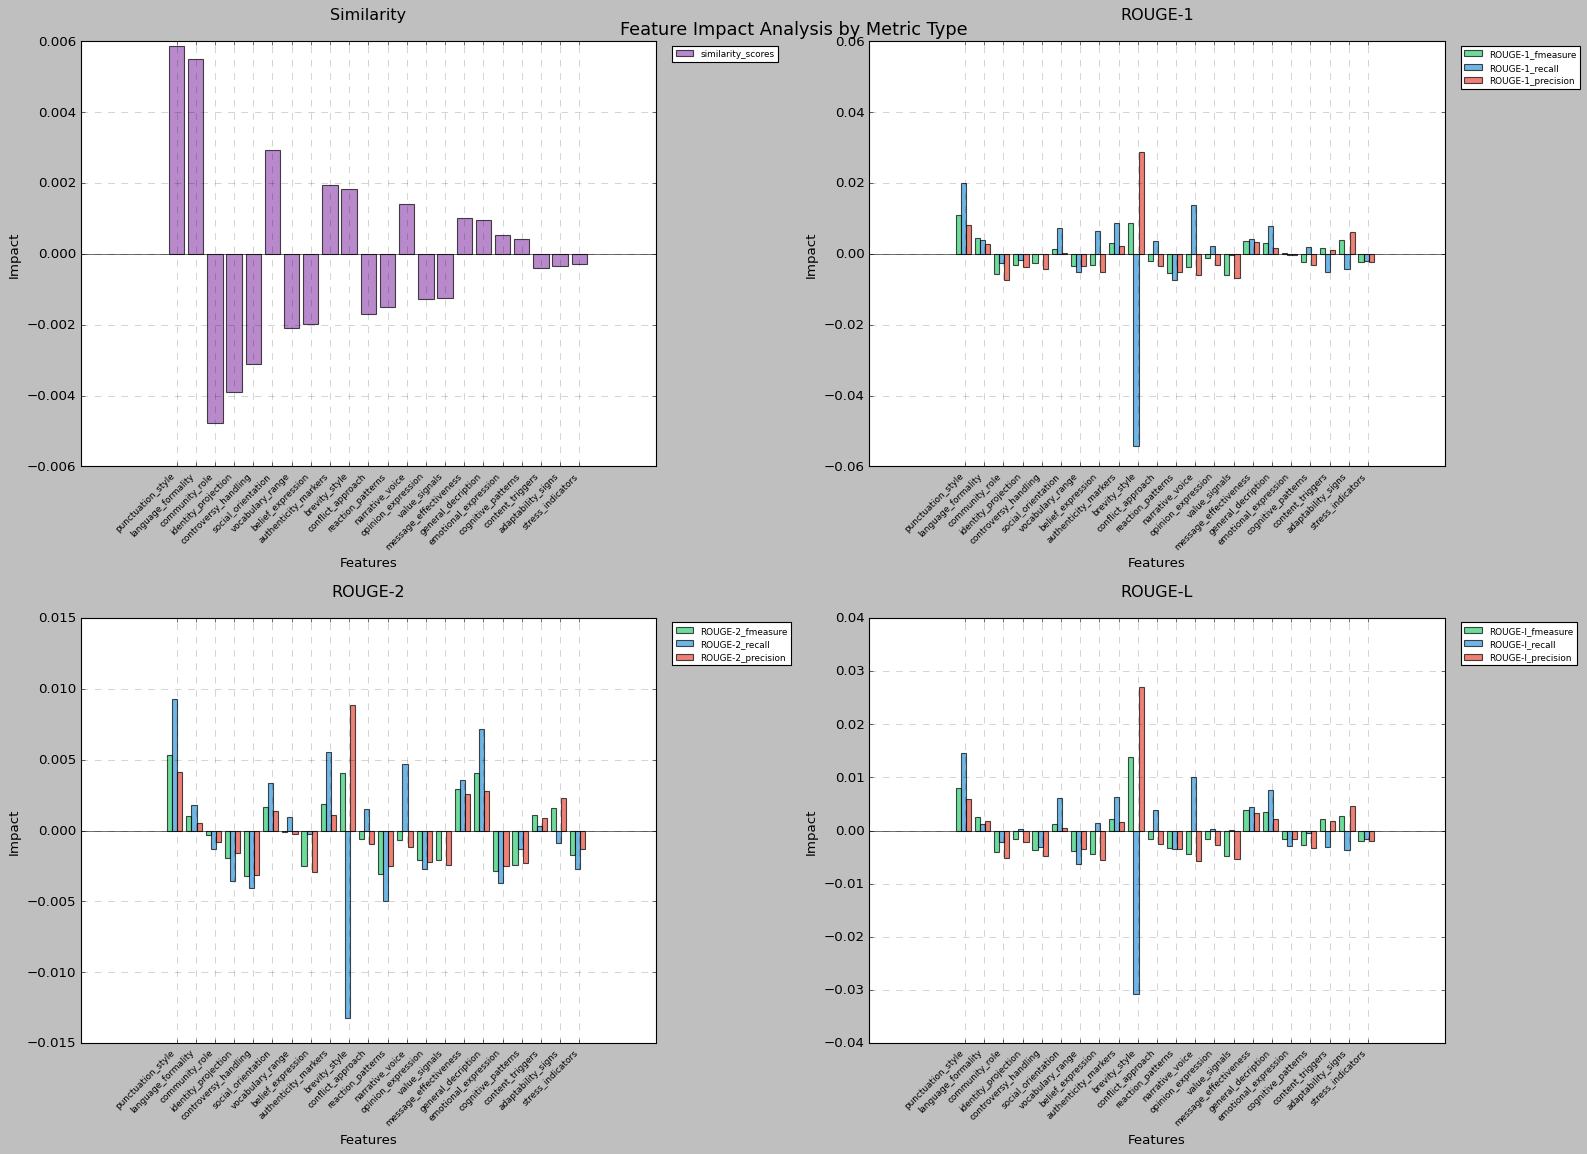

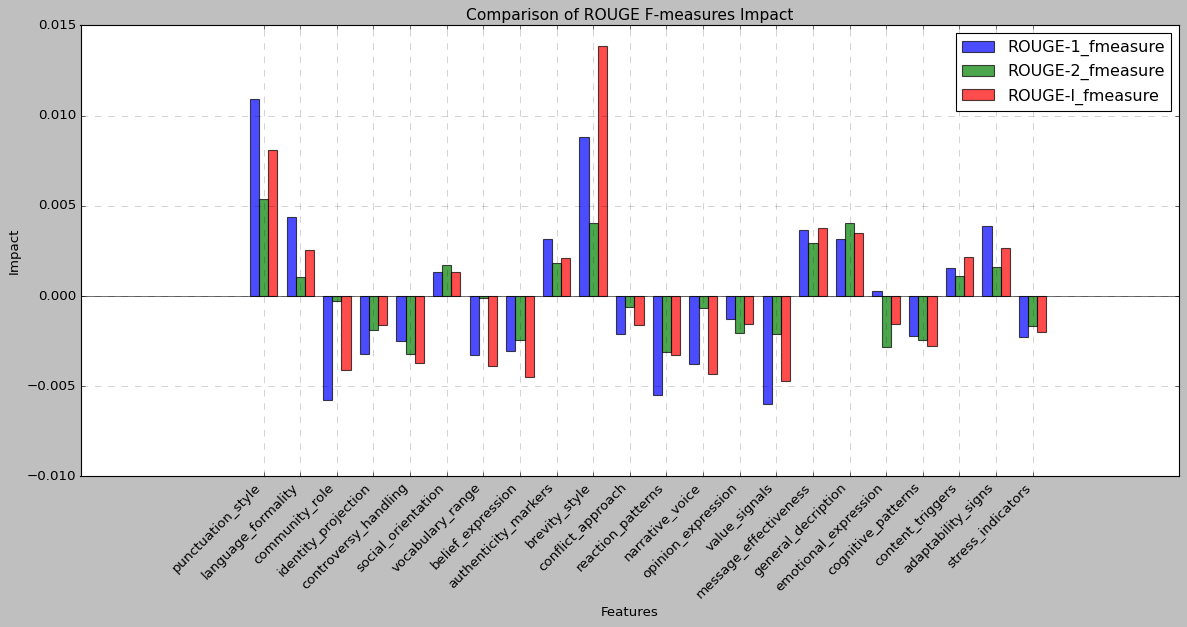


Metric Impact Correlations:
                   similarity_scores  ROUGE-1_fmeasure  ROUGE-1_recall  \
similarity_scores              1.000             0.766           0.173   
ROUGE-1_fmeasure               0.766             1.000          -0.147   
ROUGE-1_recall                 0.173            -0.147           1.000   
ROUGE-1_precision              0.513             0.837          -0.646   
ROUGE-2_fmeasure               0.632             0.845          -0.074   
ROUGE-2_recall                 0.431             0.202           0.841   
ROUGE-2_precision              0.542             0.842          -0.456   
ROUGE-l_fmeasure               0.628             0.933          -0.428   
ROUGE-l_recall                 0.251            -0.057           0.975   
ROUGE-l_precision              0.456             0.793          -0.695   

                   ROUGE-1_precision  ROUGE-2_fmeasure  ROUGE-2_recall  \
similarity_scores              0.513             0.632           0.431   
ROUGE-1_

In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
from typing import List, Dict, Tuple
import matplotlib.pyplot as plt
import seaborn as sns

def load_and_prepare_data(filepath: str) -> pd.DataFrame:
    """
    Load the CSV file and prepare the data for analysis.
    
    Args:
        filepath (str): Path to the CSV file
        
    Returns:
        pd.DataFrame: Processed DataFrame
    """
    # Read the CSV file
    df = pd.read_csv(filepath)
    
    # Get all persona columns
    persona_columns = [col for col in df.columns if col.startswith('persona_')]
    
    # Verify that each row has exactly 5 True values
    true_counts = df[persona_columns].sum(axis=1)
    if not (true_counts == 5).all():
        print("Warning: Not all rows have exactly 5 True values")
        print("True value distribution:", true_counts.value_counts())
    
    return df

def calculate_feature_impact(df: pd.DataFrame, 
                           target_cols: List[str] = ['similarity_scores', 'rouge1_fmeasure','rouge1_recall','rouge1_precision','rouge2_fmeasure','rouge2_recall','rouge2_precision','rougel_fmeasure','rougel_recall','rougel_precision']) -> pd.DataFrame:
    """
    Calculate the impact of each feature on target metrics.
    
    Args:
        df (pd.DataFrame): Input DataFrame
        target_cols (List[str]): List of target metrics to analyze
        
    Returns:
        pd.DataFrame: Feature impact analysis results
    """
    persona_columns = [col for col in df.columns if col.startswith('persona_')]
    results = []
    
    for feature in persona_columns:
        feature_impact = {
            'feature': feature.replace('persona_', '')
        }
        
        # Calculate frequency
        feature_impact['frequency'] = df[feature].sum()
        
        # Calculate impact on each target metric
        for target in target_cols:
            with_feature = df[df[feature] == True][target].mean()
            without_feature = df[df[feature] == False][target].mean()
            impact = with_feature - without_feature
            
            feature_impact[f'{target}_impact'] = impact
        
        results.append(feature_impact)
    
    return pd.DataFrame(results)

def find_common_combinations(df: pd.DataFrame, top_n: int = 5) -> List[Dict]:
    """
    Find the most common feature combinations.
    
    Args:
        df (pd.DataFrame): Input DataFrame
        top_n (int): Number of top combinations to return
        
    Returns:
        List[Dict]: Top feature combinations and their counts
    """
    persona_columns = [col for col in df.columns if col.startswith('persona_')]
    
    # Create combinations for each row
    combinations = []
    for _, row in df.iterrows():
        active_features = [col.replace('persona_', '') 
                         for col in persona_columns 
                         if row[col] == True]
        combinations.append('|'.join(sorted(active_features)))
    
    # Count combinations
    combo_counts = Counter(combinations)
    
    # Get top N combinations
    top_combinations = [
        {'combo': combo, 'count': count}
        for combo, count in combo_counts.most_common(top_n)
    ]
    
    return top_combinations

def plot_feature_impact(impact_df: pd.DataFrame, figsize: Tuple[int, int] = (20, 15)) -> None:
    """
    Create visualizations of feature impacts for all metrics.
    
    Args:
        impact_df (pd.DataFrame): Feature impact analysis results
        figsize (Tuple[int, int]): Figure size
    """
    # Group metrics by type
    metric_groups = {
        'Similarity': ['similarity_scores_impact'],
        'ROUGE-1': ['rouge1_fmeasure_impact', 'rouge1_recall_impact', 'rouge1_precision_impact'],
        'ROUGE-2': ['rouge2_fmeasure_impact', 'rouge2_recall_impact', 'rouge2_precision_impact'],
        'ROUGE-L': ['rougel_fmeasure_impact', 'rougel_recall_impact', 'rougel_precision_impact']
    }
    
    # Create figure with subplots
    fig, axes = plt.subplots(2, 2, figsize=figsize)
    fig.suptitle('Feature Impact Analysis by Metric Type', fontsize=16, y=0.95)
    
    # Color scheme for different metric types within each group
    colors = {
        'fmeasure': '#2ecc71',
        'recall': '#3498db',
        'precision': '#e74c3c',
        'scores': '#9b59b6'
    }
    
    # Plot each metric group
    for (title, metrics), ax in zip(metric_groups.items(), axes.flat):
        x = np.arange(len(impact_df))
        bar_width = 0.8 / len(metrics)
        
        for i, metric in enumerate(metrics):
            metric_type = next((t for t in colors.keys() if t in metric), 'scores')
            offset = i * bar_width - (len(metrics) - 1) * bar_width / 1.5
            
            bars = ax.bar(x + offset, 
                         impact_df[metric],
                         bar_width,
                         label=metric.replace('_impact', '').replace('rouge', 'ROUGE-'),
                         color=colors[metric_type],
                         alpha=0.7)
            
        # Customize each subplot
        ax.set_title(title, pad=20)
        ax.set_xlabel('Features')
        ax.set_ylabel('Impact')
        ax.grid(True, linestyle='--', alpha=0.3)
        ax.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
        
        # Rotate feature labels
        ax.set_xticks(x)
        ax.set_xticklabels(impact_df['feature'], rotation=45, ha='right',  fontsize=8)
        
        # Add legend
        
        ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=8)  
        plt.subplots_adjust(hspace=0.4, wspace=0.3)  # Increase spacing between subplots

        
        # Adjust y-axis limits to be symmetric around zero
        max_abs_val = max(abs(ax.get_ylim()[0]), abs(ax.get_ylim()[1]))
        ax.set_ylim(-max_abs_val, max_abs_val)
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

    # Create additional plot for comparison of F-measures only
    plt.figure(figsize=(15, 8))
    x = np.arange(len(impact_df))
    bar_width = 0.25

    metrics = ['rouge1_fmeasure_impact', 'rouge2_fmeasure_impact', 'rougel_fmeasure_impact']
    for i, metric in enumerate(metrics):
        plt.bar(x + i*bar_width - bar_width,
                impact_df[metric],
                bar_width,
                label=metric.replace('_impact', '').replace('rouge', 'ROUGE-'),
                alpha=0.7)

    plt.title('Comparison of ROUGE F-measures Impact', fontsize=14)
    plt.xlabel('Features')
    plt.ylabel('Impact')
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
    plt.xticks(x, impact_df['feature'], rotation=45, ha='right')
    plt.legend()
    plt.tight_layout()
    plt.show()

def analyze_metric_correlations(impact_df: pd.DataFrame) -> pd.DataFrame:
    """
    Analyze correlations between different metric impacts.
    
    Args:
        impact_df (pd.DataFrame): Feature impact analysis results
        
    Returns:
        pd.DataFrame: Correlation matrix of metric impacts
    """
    # Select only impact columns
    impact_columns = [col for col in impact_df.columns if col.endswith('_impact')]
    
    # Calculate correlations
    correlations = impact_df[impact_columns].corr()
    
    # Clean up column names for display
    correlations.columns = [col.replace('_impact', '').replace('rouge', 'ROUGE-') 
                          for col in correlations.columns]
    correlations.index = correlations.columns
    
    return correlations

def main(filepath: str):
    # Your existing main function code here...
    df = load_and_prepare_data(filepath)
    impact_df = calculate_feature_impact(df)
    
    # Sort by absolute similarity impact
    impact_df['abs_similarity_impact'] = impact_df['similarity_scores_impact'].abs()
    impact_df = impact_df.sort_values('abs_similarity_impact', ascending=False)
    impact_df = impact_df.drop('abs_similarity_impact', axis=1)
    
    # Create visualizations
    plot_feature_impact(impact_df)
    
    # Calculate and print metric correlations
    correlations = analyze_metric_correlations(impact_df)
    print("\nMetric Impact Correlations:")
    print(correlations.round(3))

if __name__ == "__main__":
    # Replace with your file path
    filepath = "/Users/mogen/Desktop/Research_Case/fine_tune03/8k_gpt4o_rnd_shuffled_personas.csv"
    main(filepath)

## For Combinations 


Feature Combination Distribution Summary:
Total unique combinations: 3695

Top 10 most common combinations:
                                                                                    combination  frequency  percentage
       community_role|conflict_approach|emotional_expression|narrative_voice|opinion_expression          6        0.08
     adaptability_signs|cognitive_patterns|content_triggers|social_orientation|vocabulary_range          6        0.08
     content_triggers|controversy_handling|emotional_expression|reaction_patterns|value_signals          6        0.08
   adaptability_signs|cognitive_patterns|content_triggers|emotional_expression|vocabulary_range          6        0.08
      adaptability_signs|content_triggers|message_effectiveness|punctuation_style|value_signals          6        0.08
             adaptability_signs|community_role|narrative_voice|opinion_expression|value_signals          6        0.08
     belief_expression|conflict_approach|opinion_expressio

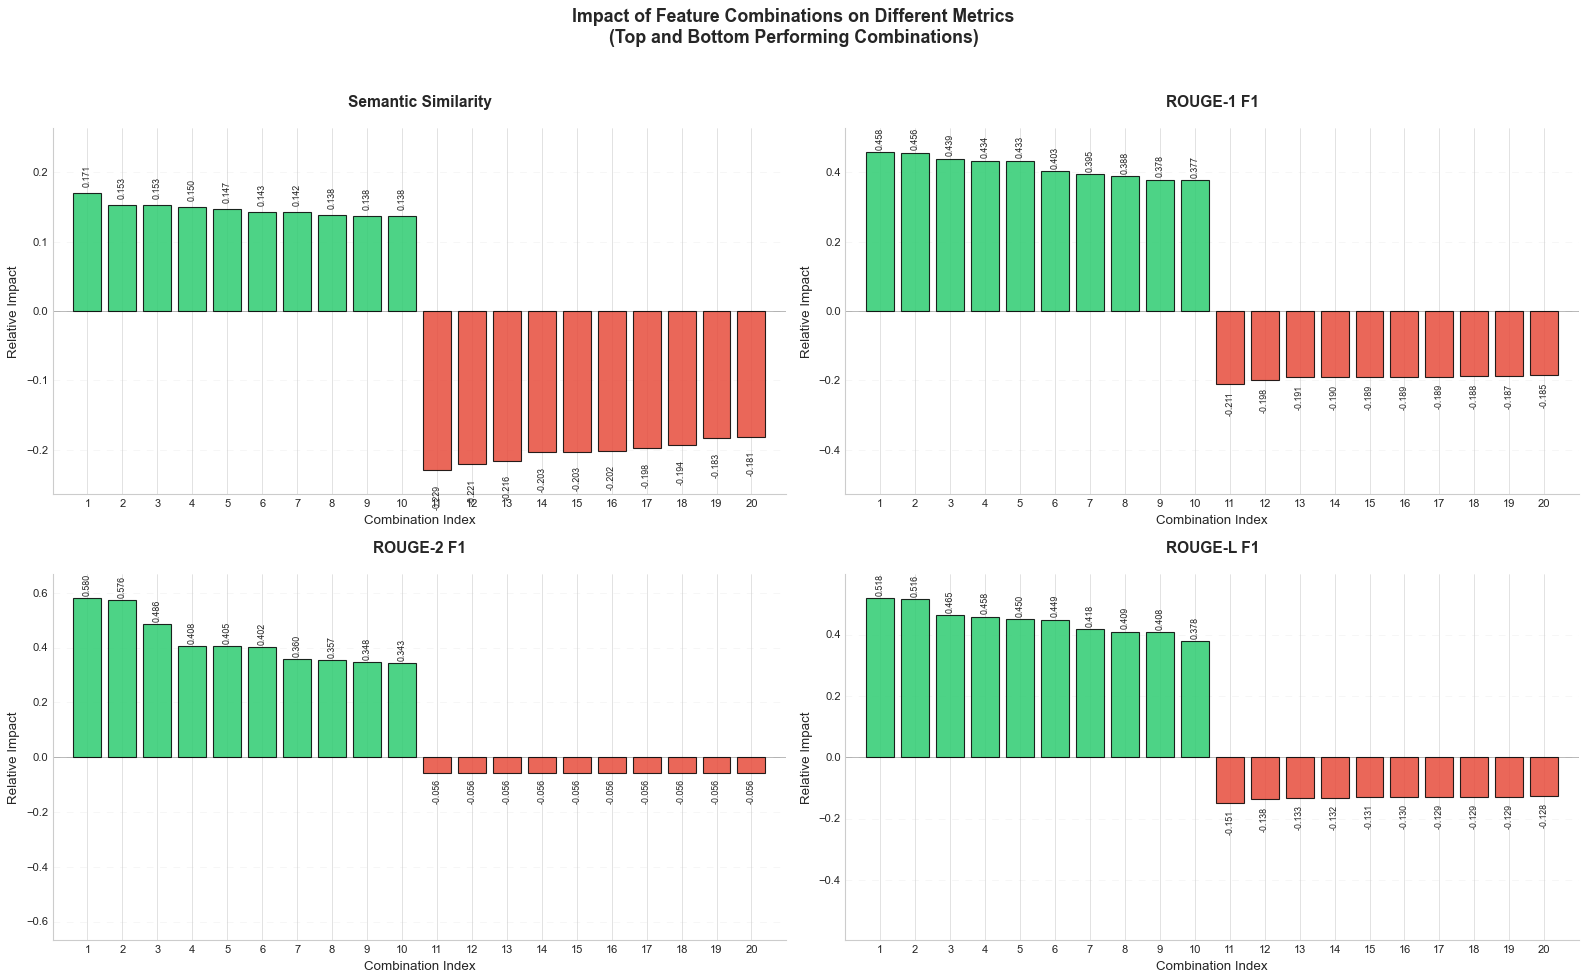

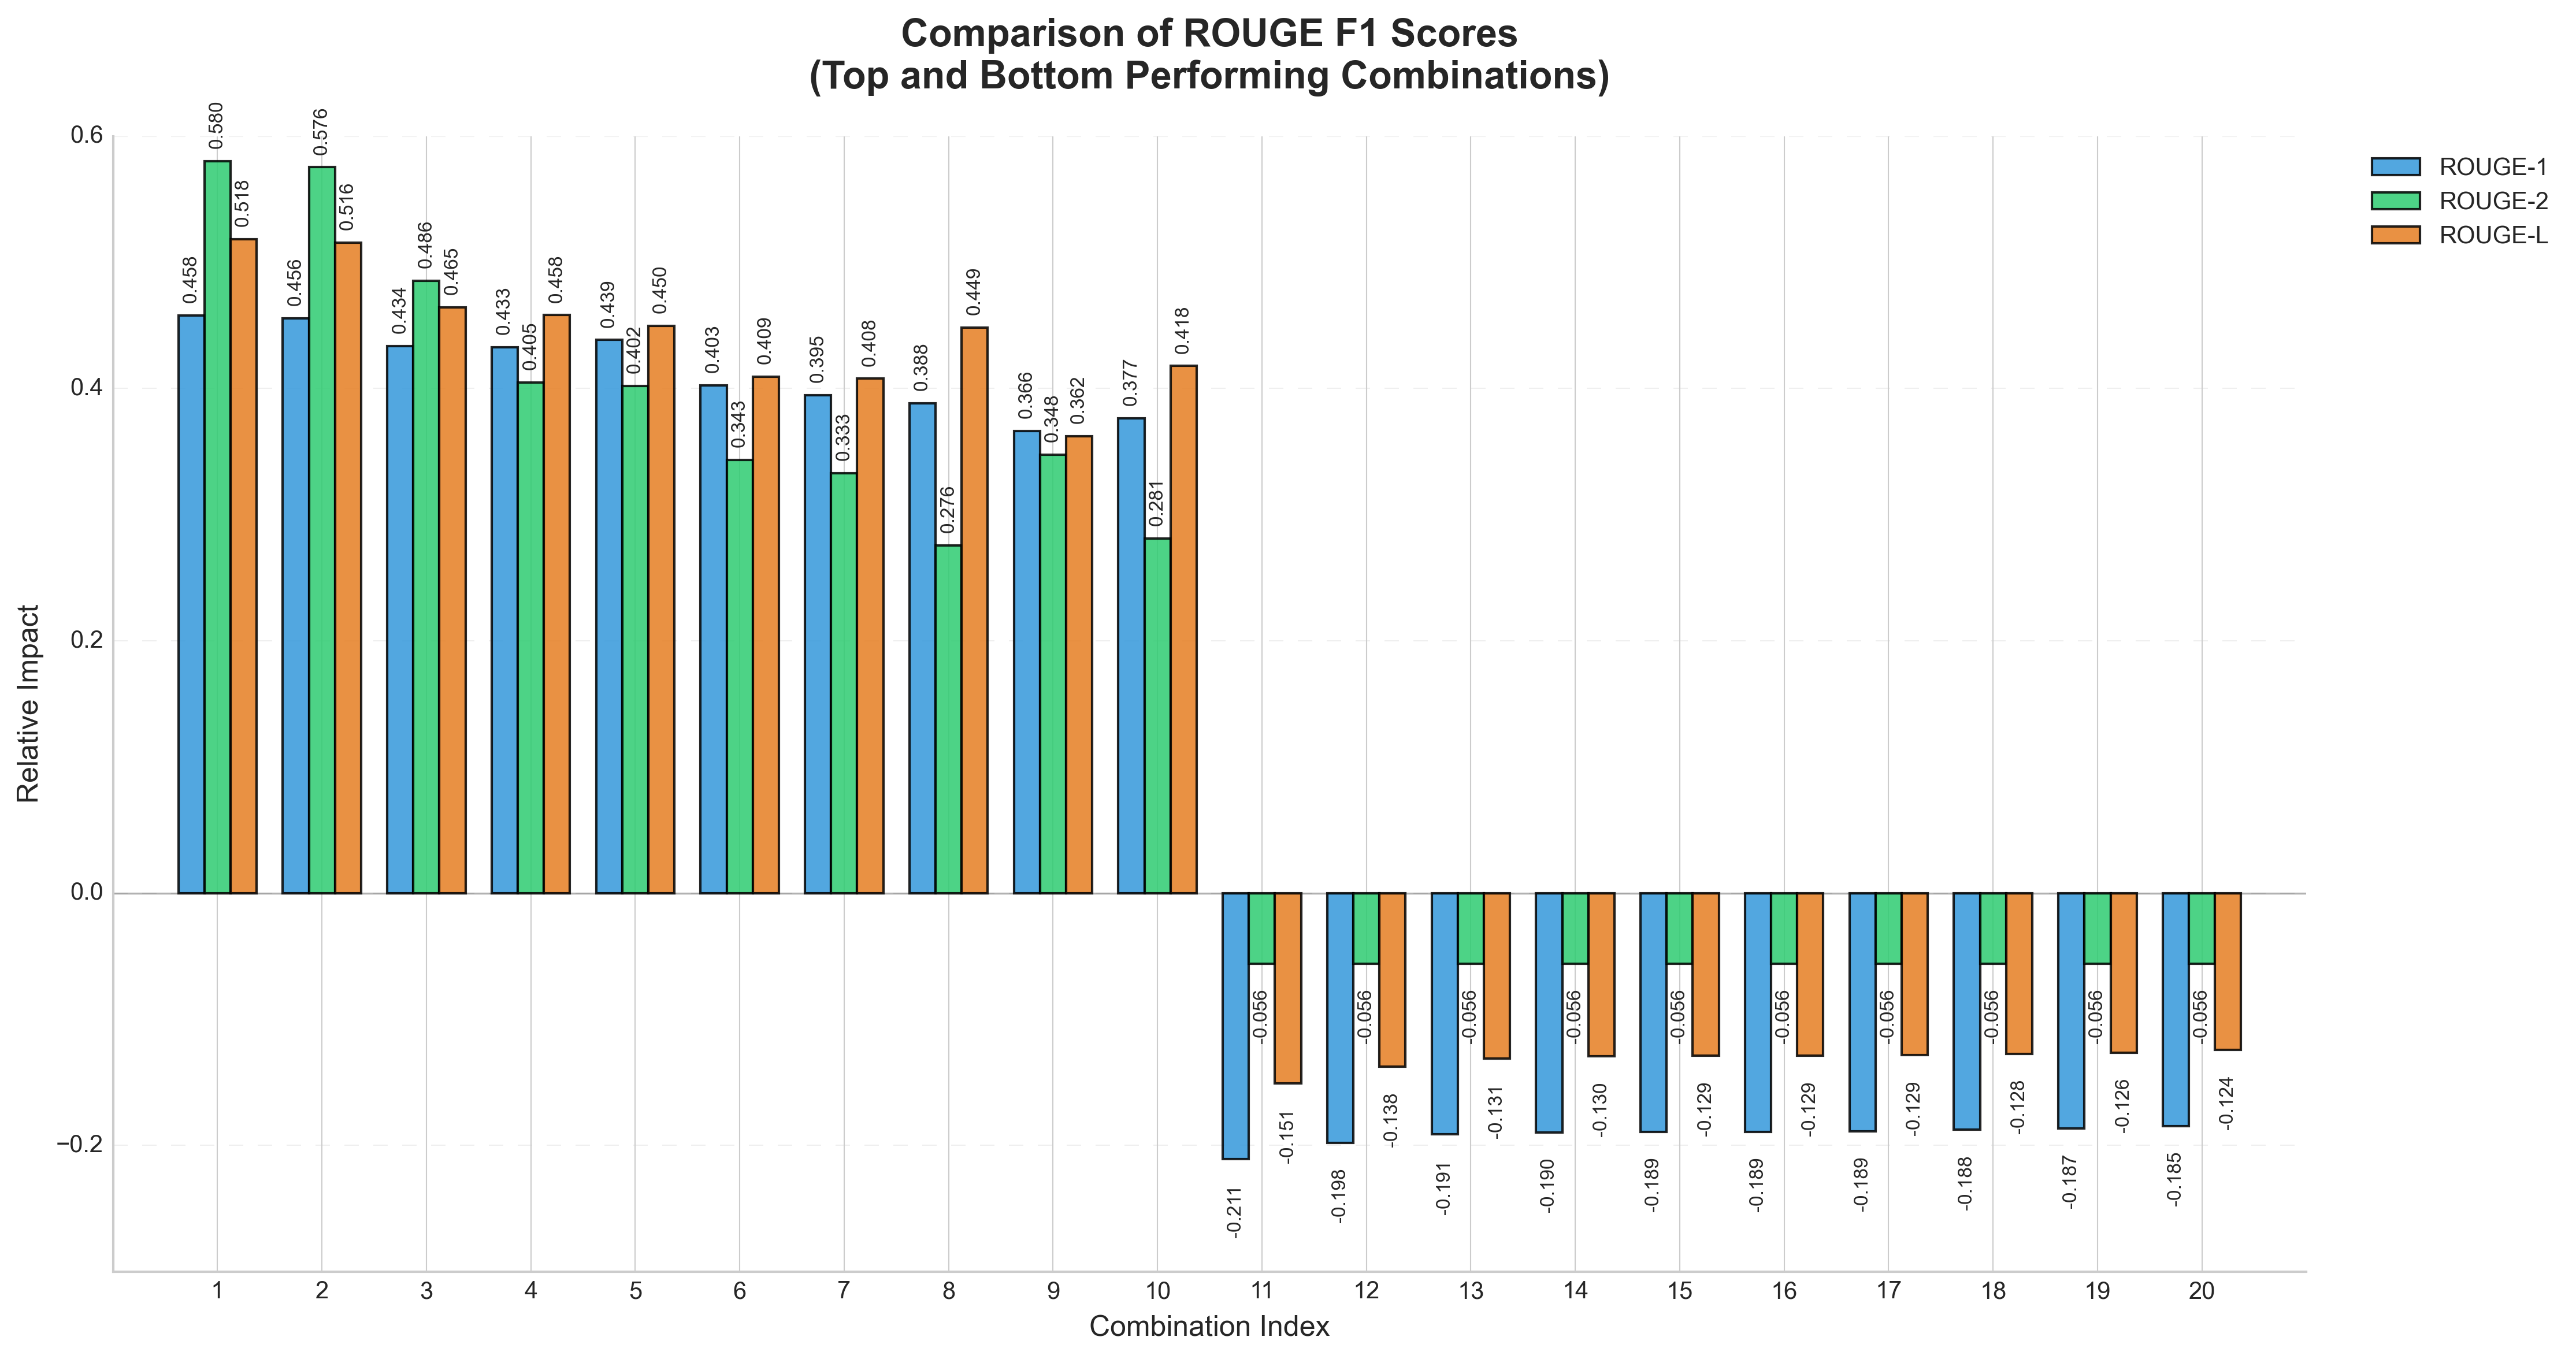

In [22]:
import pandas as pd
import numpy as np
from collections import Counter
from typing import List, Dict, Tuple
import matplotlib.pyplot as plt
import seaborn as sns

def load_and_prepare_data(filepath: str) -> pd.DataFrame:
    """
    Load the CSV file and prepare the data for analysis.
    
    Args:
        filepath (str): Path to the CSV file
        
    Returns:
        pd.DataFrame: Processed DataFrame
    """
    # Read the CSV file
    df = pd.read_csv(filepath)
    
    # Get all persona columns
    persona_columns = [col for col in df.columns if col.startswith('persona_')]
    
    # Verify that each row has exactly 5 True values
    true_counts = df[persona_columns].sum(axis=1)
    if not (true_counts == 5).all():
        print("Warning: Not all rows have exactly 5 True values")
        print("True value distribution:", true_counts.value_counts())
    
    return df

def calculate_feature_impact(df: pd.DataFrame) -> pd.DataFrame:
    """
    Calculate the impact of each feature on all metrics.
    
    Args:
        df (pd.DataFrame): Input DataFrame
        
    Returns:
        pd.DataFrame: Feature impact analysis results
    """
    target_cols = [
        'similarity_scores',
        'rouge1_fmeasure', 'rouge1_recall', 'rouge1_precision',
        'rouge2_fmeasure', 'rouge2_recall', 'rouge2_precision',
        'rougel_fmeasure', 'rougel_recall', 'rougel_precision'
    ]
    
    persona_columns = [col for col in df.columns if col.startswith('persona_')]
    results = []
    
    for feature in persona_columns:
        feature_impact = {
            'feature': feature.replace('persona_', '')
        }
        
        # Calculate frequency
        feature_impact['frequency'] = df[feature].sum()
        
        # Calculate impact on each target metric
        for target in target_cols:
            with_feature = df[df[feature] == True][target].mean()
            without_feature = df[df[feature] == False][target].mean()
            impact = with_feature - without_feature
            
            feature_impact[f'{target}_impact'] = impact
        
        results.append(feature_impact)
    
    return pd.DataFrame(results)

def analyze_combinations(df: pd.DataFrame) -> Tuple[pd.DataFrame, pd.DataFrame]:
    """
    Analyze feature combinations and their impact on all metrics.
    
    Args:
        df (pd.DataFrame): Input DataFrame
        
    Returns:
        Tuple[pd.DataFrame, pd.DataFrame]: 
            - Distribution of combinations
            - Impact analysis of combinations
    """
    target_cols = [
        'similarity_scores',
        'rouge1_fmeasure', 'rouge1_recall', 'rouge1_precision',
        'rouge2_fmeasure', 'rouge2_recall', 'rouge2_precision',
        'rougel_fmeasure', 'rougel_recall', 'rougel_precision'
    ]
    
    persona_columns = [col for col in df.columns if col.startswith('persona_')]
    
    # Create combination identifier for each row
    def get_combination_id(row):
        active_features = [col.replace('persona_', '') 
                         for col in persona_columns 
                         if row[col] == True]
        return '|'.join(sorted(active_features))
    
    df['combination_id'] = df.apply(get_combination_id, axis=1)
    
    # Calculate distribution
    combination_dist = df['combination_id'].value_counts().reset_index()
    combination_dist.columns = ['combination', 'frequency']
    combination_dist['percentage'] = (combination_dist['frequency'] / len(df) * 100).round(2)
    
    # Calculate mean values for all metrics
    metrics_avg = {}
    for metric in target_cols:
        metrics_avg[metric] = df.groupby('combination_id')[metric].agg(['mean', 'std', 'count']).round(4)
        metrics_avg[metric].columns = [f'{metric}_mean', f'{metric}_std', f'{metric}_count']
        
        # Calculate relative performance
        overall_mean = df[metric].mean()
        metrics_avg[metric][f'{metric}_relative'] = (
            metrics_avg[metric][f'{metric}_mean'] - overall_mean
        ).round(4)
    
    # Combine all metrics
    combination_impact = pd.concat([df for df in metrics_avg.values()], axis=1)
    combination_impact = combination_impact.reset_index()
    
    return combination_dist, combination_impact

def plot_combination_impact(combination_impact: pd.DataFrame, 
                          metrics: List[str] = None,
                          top_n: int = 20,
                          figsize: Tuple[int, int] = (15, 10)) -> None:
    """
    Create visualization of combination impacts for specified metrics.
    
    Args:
        combination_impact (pd.DataFrame): Combination impact analysis results
        metrics (List[str]): List of metrics to plot
        top_n (int): Number of top combinations to show
        figsize (Tuple[int, int]): Figure size
    """
    # Sort by absolute total impact
    plot_data = combination_impact.copy()
    plot_data['total_impact'] = sum(plot_data[f'{metric}_relative'].abs() for metric in metrics)
    plot_data = plot_data.nlargest(top_n, 'total_impact')
    
    # Create plot
    plt.figure(figsize=figsize)
    
    x = np.arange(0, len(plot_data))
    width = 0.8 / len(metrics)
    
    for i, metric in enumerate(metrics):
        offset = (i - len(metrics)/2 + 0.5) * width
        plt.bar(x + offset, plot_data[f'{metric}_relative'], 
                width, label=metric)
    
    plt.xlabel('Feature Combinations')
    plt.ylabel('Relative Impact')
    plt.title('Impact of Feature Combinations on Metrics')
    plt.xticks(x, range(1, len(plot_data) + 1), rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    
    plt.show()
    
    # Print combination details
    print("\nCombination details for plot:")
    for i, (_, row) in enumerate(plot_data.iterrows(), 1):
        print(f"\n{i}. Combination: {row['combination_id']}")
        print(f"   Frequency: {row['similarity_scores_count']}")
        for metric in metrics:
            print(f"   {metric} impact: {row[f'{metric}_relative']:.4f}")

def export_results(combination_dist: pd.DataFrame, 
                  combination_impact: pd.DataFrame,
                  output_prefix: str = "analysis_") -> None:
    """
    Export analysis results to CSV files.
    
    Args:
        combination_dist (pd.DataFrame): Combination distribution results
        combination_impact (pd.DataFrame): Combination impact results
        output_prefix (str): Prefix for output filenames
    """
    combination_dist.to_csv(f"{output_prefix}distribution.csv", index=False)
    combination_impact.to_csv(f"{output_prefix}impact.csv", index=False)

def main(filepath: str):
    """
    Main function to run the analysis.
    
    Args:
        filepath (str): Path to the CSV file
    """
    # Load and prepare data
    df = load_and_prepare_data(filepath)
    
    # Calculate feature impact
    impact_df = calculate_feature_impact(df)
    
    # Analyze combinations
    combination_dist, combination_impact = analyze_combinations(df)
    
    # Print distribution summary
    print("\nFeature Combination Distribution Summary:")
    print(f"Total unique combinations: {len(combination_dist)}")
    print("\nTop 10 most common combinations:")
    print(combination_dist.head(10).to_string(index=False))
    
    # Print impact summary for all metrics
    print("\nCombination Impact Summary (top 10 by total impact):")
    metrics = ['similarity_scores', 'rouge1_fmeasure', 'rouge2_fmeasure', 'rougel_fmeasure']
    
    # Calculate total impact across all metrics
    for metric in metrics:
        combination_impact[f'{metric}_abs_impact'] = combination_impact[f'{metric}_relative'].abs()
    
    combination_impact['total_impact'] = sum(
        combination_impact[f'{metric}_abs_impact'] for metric in metrics
    )
    
    impact_summary = combination_impact.nlargest(10, 'total_impact')
    
    display_columns = ['combination_id']
    for metric in metrics:
        display_columns.extend([f'{metric}_mean', f'{metric}_relative'])
    display_columns.append('similarity_scores_count')
    
    print(impact_summary[display_columns].to_string(index=False))
    
    # Create visualizations
    # Plot similarity and ROUGE-1 F1
    plot_combination_impact(combination_impact, 
                          metrics=['similarity_scores', 'rouge1_fmeasure'])
    
    # Plot all ROUGE F1 scores
    plot_combination_impact(combination_impact, 
                          metrics=['rouge1_fmeasure', 'rouge2_fmeasure', 'rougel_fmeasure'])
    
    # Export results
    export_results(combination_dist, combination_impact)

import pandas as pd
import numpy as np
from collections import Counter
from typing import List, Dict, Tuple
import matplotlib.pyplot as plt
import seaborn as sns

def load_and_prepare_data(filepath: str) -> pd.DataFrame:
    """
    Load the CSV file and prepare the data for analysis.
    
    Args:
        filepath (str): Path to the CSV file
        
    Returns:
        pd.DataFrame: Processed DataFrame
    """
    # Read the CSV file
    df = pd.read_csv(filepath)
    
    # Get all persona columns
    persona_columns = [col for col in df.columns if col.startswith('persona_')]
    
    # Verify that each row has exactly 5 True values
    true_counts = df[persona_columns].sum(axis=1)
    if not (true_counts == 5).all():
        print("Warning: Not all rows have exactly 5 True values")
        print("True value distribution:", true_counts.value_counts())
    
    return df

def calculate_feature_impact(df: pd.DataFrame) -> pd.DataFrame:
    """
    Calculate the impact of each feature on all metrics.
    
    Args:
        df (pd.DataFrame): Input DataFrame
        
    Returns:
        pd.DataFrame: Feature impact analysis results
    """
    target_cols = [
        'similarity_scores',
        'rouge1_fmeasure', 'rouge1_recall', 'rouge1_precision',
        'rouge2_fmeasure', 'rouge2_recall', 'rouge2_precision',
        'rougel_fmeasure', 'rougel_recall', 'rougel_precision'
    ]
    
    persona_columns = [col for col in df.columns if col.startswith('persona_')]
    results = []
    
    for feature in persona_columns:
        feature_impact = {
            'feature': feature.replace('persona_', '')
        }
        
        # Calculate frequency
        feature_impact['frequency'] = df[feature].sum()
        
        # Calculate impact on each target metric
        for target in target_cols:
            with_feature = df[df[feature] == True][target].mean()
            without_feature = df[df[feature] == False][target].mean()
            impact = with_feature - without_feature
            
            feature_impact[f'{target}_impact'] = impact
        
        results.append(feature_impact)
    
    return pd.DataFrame(results)

def analyze_combinations(df: pd.DataFrame) -> Tuple[pd.DataFrame, pd.DataFrame]:
    """
    Analyze feature combinations and their impact on all metrics.
    
    Args:
        df (pd.DataFrame): Input DataFrame
        
    Returns:
        Tuple[pd.DataFrame, pd.DataFrame]: 
            - Distribution of combinations
            - Impact analysis of combinations
    """
    target_cols = [
        'similarity_scores',
        'rouge1_fmeasure', 'rouge1_recall', 'rouge1_precision',
        'rouge2_fmeasure', 'rouge2_recall', 'rouge2_precision',
        'rougel_fmeasure', 'rougel_recall', 'rougel_precision'
    ]
    
    persona_columns = [col for col in df.columns if col.startswith('persona_')]
    
    # Create combination identifier for each row
    def get_combination_id(row):
        active_features = [col.replace('persona_', '') 
                         for col in persona_columns 
                         if row[col] == True]
        return '|'.join(sorted(active_features))
    
    df['combination_id'] = df.apply(get_combination_id, axis=1)
    
    # Calculate distribution
    combination_dist = df['combination_id'].value_counts().reset_index()
    combination_dist.columns = ['combination', 'frequency']
    combination_dist['percentage'] = (combination_dist['frequency'] / len(df) * 100).round(2)
    
    # Calculate mean values for all metrics
    metrics_avg = {}
    for metric in target_cols:
        metrics_avg[metric] = df.groupby('combination_id')[metric].agg(['mean', 'std', 'count']).round(4)
        metrics_avg[metric].columns = [f'{metric}_mean', f'{metric}_std', f'{metric}_count']
        
        # Calculate relative performance
        overall_mean = df[metric].mean()
        metrics_avg[metric][f'{metric}_relative'] = (
            metrics_avg[metric][f'{metric}_mean'] - overall_mean
        ).round(4)
    
    # Combine all metrics
    combination_impact = pd.concat([df for df in metrics_avg.values()], axis=1)
    combination_impact = combination_impact.reset_index()
    
    return combination_dist, combination_impact

def plot_combination_impact(combination_impact: pd.DataFrame, 
                          metrics: List[str] = None,
                          top_n: int = 20,
                          figsize: Tuple[int, int] = (15, 10)) -> None:
    """
    Create visualization of combination impacts for specified metrics.
    
    Args:
        combination_impact (pd.DataFrame): Combination impact analysis results
        metrics (List[str]): List of metrics to plot
        top_n (int): Number of top combinations to show
        figsize (Tuple[int, int]): Figure size
    """
    # Sort by absolute total impact
    plot_data = combination_impact.copy()
    plot_data['total_impact'] = sum(plot_data[f'{metric}_relative'].abs() for metric in metrics)
    plot_data = plot_data.nlargest(top_n, 'total_impact')
    
    # Create plot
    plt.figure(figsize=figsize)
    
    x = np.arange(0, len(plot_data))
    width = 0.8 / len(metrics)
    
    for i, metric in enumerate(metrics):
        offset = (i - len(metrics)/2 + 0.5) * width
        plt.bar(x + offset, plot_data[f'{metric}_relative'], 
                width, label=metric)
    
    plt.xlabel('Feature Combinations')
    plt.ylabel('Relative Impact')
    plt.title('Impact of Feature Combinations on Metrics')
    plt.xticks(x, range(1, len(plot_data) + 1), rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    
    plt.show()
    
    # Print combination details
    print("\nCombination details for plot:")
    for i, (_, row) in enumerate(plot_data.iterrows(), 1):
        print(f"\n{i}. Combination: {row['combination_id']}")
        print(f"   Frequency: {row['similarity_scores_count']}")
        for metric in metrics:
            print(f"   {metric} impact: {row[f'{metric}_relative']:.4f}")

def export_results(combination_dist: pd.DataFrame, 
                  combination_impact: pd.DataFrame,
                  output_prefix: str = "analysis_") -> None:
    """
    Export analysis results to CSV files.
    
    Args:
        combination_dist (pd.DataFrame): Combination distribution results
        combination_impact (pd.DataFrame): Combination impact results
        output_prefix (str): Prefix for output filenames
    """
    combination_dist.to_csv(f"{output_prefix}distribution.csv", index=False)
    combination_impact.to_csv(f"{output_prefix}impact.csv", index=False)

def main(filepath: str):
    """
    Main function to run the analysis.
    
    Args:
        filepath (str): Path to the CSV file
    """
    # Load and prepare data
    df = load_and_prepare_data(filepath)
    
    # Calculate feature impact
    impact_df = calculate_feature_impact(df)
    
    # Analyze combinations
    combination_dist, combination_impact = analyze_combinations(df)
    
    # Print distribution summary
    print("\nFeature Combination Distribution Summary:")
    print(f"Total unique combinations: {len(combination_dist)}")
    print("\nTop 10 most common combinations:")
    print(combination_dist.head(10).to_string(index=False))
    
    # Print impact summary for all metrics
    print("\nCombination Impact Summary (top 10 by total impact):")
    metrics = ['similarity_scores', 'rouge1_fmeasure', 'rouge2_fmeasure', 'rougel_fmeasure']
    
    # Calculate total impact across all metrics
    for metric in metrics:
        combination_impact[f'{metric}_abs_impact'] = combination_impact[f'{metric}_relative'].abs()
    
    combination_impact['total_impact'] = sum(
        combination_impact[f'{metric}_abs_impact'] for metric in metrics
    )
    
    impact_summary = combination_impact.nlargest(10, 'total_impact')
    
    display_columns = ['combination_id']
    for metric in metrics:
        display_columns.extend([f'{metric}_mean', f'{metric}_relative'])
    display_columns.append('similarity_scores_count')
    
    print(impact_summary[display_columns].to_string(index=False))
    
    # Create visualizations
    # Plot similarity and ROUGE-1 F1
    plot_combination_impact(combination_impact, 
                          metrics=['similarity_scores', 'rouge1_fmeasure'])
    
    # Plot all ROUGE F1 scores
    plot_combination_impact(combination_impact, 
                          metrics=['rouge1_fmeasure', 'rouge2_fmeasure', 'rougel_fmeasure'])
    
    # Export results
    export_results(combination_dist, combination_impact)

def plot_all_metrics(combination_impact: pd.DataFrame, 
                    n_best: int = 10,
                    n_worst: int = 10,
                    figsize: Tuple[int, int] = (20, 12)) -> None:
    """
    Create four subplots showing the impact of combinations on each metric.
    Enhanced design for publication quality.
    """
    metrics = ['similarity_scores', 'rouge1_fmeasure', 'rouge2_fmeasure', 'rougel_fmeasure']
    titles = ['Semantic Similarity', 'ROUGE-1 F1', 'ROUGE-2 F1', 'ROUGE-L F1']
    
    # Set the style for publication-quality plots
    plt.style.use('seaborn-v0_8-whitegrid')
    
    # Create figure and subplots with specific spacing
    fig, axes = plt.subplots(2, 2, figsize=figsize)
    fig.suptitle('Impact of Feature Combinations on Different Metrics\n(Top and Bottom Performing Combinations)', 
                 fontsize=16, y=1.02, fontweight='bold')
    
    # Flatten axes for easier iteration
    axes = axes.flatten()
    
    # Custom colors with higher saturation
    pos_color = '#2ECC71'  # Green
    neg_color = '#E74C3C'  # Red
    
    for idx, (metric, title) in enumerate(zip(metrics, titles)):
        # Get best and worst combinations
        best = combination_impact.nlargest(n_best, f'{metric}_relative')
        worst = combination_impact.nsmallest(n_worst, f'{metric}_relative')
        plot_data = pd.concat([best, worst])
        
        # Create color palette
        colors = [pos_color] * n_best + [neg_color] * n_worst
        
        # Create bar plot
        bars = axes[idx].bar(range(1, len(plot_data) + 1), 
                           plot_data[f'{metric}_relative'],
                           color=colors,
                           alpha=0.85,
                           width=0.8)
        
        # Customize plot
        axes[idx].set_title(title, pad=20, fontsize=14, fontweight='bold')
        axes[idx].set_xlabel('Combination Index', fontsize=12)
        axes[idx].set_ylabel('Relative Impact', fontsize=12)
        
        # Customize grid
        axes[idx].grid(True, axis='y', linestyle='--', alpha=0.3)
        axes[idx].set_axisbelow(True)  # Put grid behind bars
        
        # Customize ticks
        axes[idx].tick_params(axis='both', labelsize=10)
        axes[idx].set_xticks(range(1, len(plot_data) + 1))
        
        # Set x-axis limits to start at 0
        axes[idx].set_xlim(0, len(plot_data) + 1)
        
        # Add horizontal line at y=0
        axes[idx].axhline(y=0, color='black', linestyle='-', linewidth=0.8, alpha=0.3)
        
        # Add value labels on the bars
        for bar in bars:
            height = bar.get_height()
            label_position = height + 0.01 if height >= 0 else height - 0.02
            axes[idx].text(bar.get_x() + bar.get_width()/2, label_position,
                         f'{height:.3f}',
                         ha='center', va='bottom' if height >= 0 else 'top',
                         fontsize=8, rotation=90)
        
        # Set y-axis limits with some padding
        max_abs_val = max(abs(plot_data[f'{metric}_relative'].max()), 
                         abs(plot_data[f'{metric}_relative'].min()))
        axes[idx].set_ylim(-max_abs_val * 1.15, max_abs_val * 1.15)
        
        # Remove top and right spines
        axes[idx].spines['top'].set_visible(False)
        axes[idx].spines['right'].set_visible(False)
    
    plt.tight_layout()
    plt.show()

def plot_rouge_f1_comparison(combination_impact: pd.DataFrame,
                           n_best: int = 10,
                           n_worst: int = 10,
                           figsize: Tuple[int, int] = (15, 8)) -> None:
    """
    Create a comparison plot of ROUGE F1 scores.
    Enhanced design for publication quality.
    """
    metrics = ['rouge1_fmeasure', 'rouge2_fmeasure', 'rougel_fmeasure']
    labels = ['ROUGE-1', 'ROUGE-2', 'ROUGE-L']
    
    # Set style for publication-quality plots
    plt.style.use('seaborn-v0_8-whitegrid')
    
    # Calculate average impact across ROUGE metrics
    combination_impact['rouge_avg_impact'] = combination_impact[[f'{m}_relative' for m in metrics]].mean(axis=1)
    
    # Get best and worst combinations based on average ROUGE impact
    best = combination_impact.nlargest(n_best, 'rouge_avg_impact')
    worst = combination_impact.nsmallest(n_worst, 'rouge_avg_impact')
    plot_data = pd.concat([best, worst])
    
    # Create figure
    plt.figure(figsize=figsize, dpi=300)  # Higher DPI for better quality
    
    # Custom colors
    colors = ['#3498DB', '#2ECC71', '#E67E22']  # Blue, Green, Orange
    
    x = np.arange(1, len(plot_data) + 1)
    width = 0.25
    
    # Create bars for each ROUGE metric
    for i, (metric, label, color) in enumerate(zip(metrics, labels, colors)):
        offset = (i - 1) * width
        bars = plt.bar(x + offset, plot_data[f'{metric}_relative'],
                      width, label=label,
                      color=color,
                      alpha=0.85)
        
        # Add value labels
        for bar in bars:
            height = bar.get_height()
            label_position = height + 0.01 if height >= 0 else height - 0.02
            plt.text(bar.get_x() + bar.get_width()/2, label_position,
                    f'{height:.3f}',
                    ha='center', va='bottom' if height >= 0 else 'top',
                    fontsize=8, rotation=90)
    
    # Customize plot
    plt.title('Comparison of ROUGE F1 Scores\n(Top and Bottom Performing Combinations)', 
             pad=20, fontsize=16, fontweight='bold')
    plt.xlabel('Combination Index', fontsize=12)
    plt.ylabel('Relative Impact', fontsize=12)
    
    # Customize grid
    plt.grid(True, axis='y', linestyle='--', alpha=0.3)
    plt.gca().set_axisbelow(True)
    
    # Customize legend
    plt.legend(fontsize=10, frameon=True, facecolor='white', edgecolor='none',
              bbox_to_anchor=(1.02, 1), loc='upper left')
    
    # Add horizontal line at y=0
    plt.axhline(y=0, color='black', linestyle='-', linewidth=0.8, alpha=0.3)
    
    # Customize ticks and limits
    plt.xticks(x, range(1, len(plot_data) + 1), fontsize=10)
    plt.yticks(fontsize=10)
    plt.xlim(0, len(plot_data) + 1)  # Force x-axis to start at 0
    
    # Remove top and right spines
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

def main(filepath: str):
    """
    Main function to run the analysis.
    
    Args:
        filepath (str): Path to the CSV file
    """
    # Load and prepare data
    df = load_and_prepare_data(filepath)
    
    # Calculate feature impact
    impact_df = calculate_feature_impact(df)
    
    # Analyze combinations
    combination_dist, combination_impact = analyze_combinations(df)
    
    # Print distribution summary
    print("\nFeature Combination Distribution Summary:")
    print(f"Total unique combinations: {len(combination_dist)}")
    print("\nTop 10 most common combinations:")
    print(combination_dist.head(10).to_string(index=False))
    
    # Create visualizations
    plot_all_metrics(combination_impact)
    plot_rouge_f1_comparison(combination_impact)
    
    # Export results
    export_results(combination_dist, combination_impact)
if __name__ == "__main__":
    # Replace with your file path
    filepath = "/Users/mogen/Desktop/Research_Case/fine_tune03/8k_gpt4o_rnd_shuffled_personas.csv"
    main(filepath)

## all data points ploted

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple, List

def load_and_process_data(filepath: str) -> pd.DataFrame:
    """
    Load the impact analysis data and add categorization for each ROUGE metric.
    """
    df = pd.read_csv(filepath)
    
    rouge_metrics = [
        ('rouge1_fmeasure_relative', 'ROUGE-1'),
        ('rouge2_fmeasure_relative', 'ROUGE-2'),
        ('rougel_fmeasure_relative', 'ROUGE-L')
    ]
    
    # Calculate total impacts and categories for each ROUGE metric
    for rouge_col, rouge_name in rouge_metrics:
        # Calculate total impact
        df[f'total_impact_{rouge_name}'] = np.abs(df['similarity_scores_relative']) + np.abs(df[rouge_col])
        
        # Categorize combinations
        conditions = [
            # High impact in both metrics
            (np.abs(df['similarity_scores_relative']) > 0.05) & (np.abs(df[rouge_col]) > 0.05),
            # High similarity impact only
            (np.abs(df['similarity_scores_relative']) > 0.05) & (np.abs(df[rouge_col]) <= 0.05),
            # High rouge impact only
            (np.abs(df['similarity_scores_relative']) <= 0.05) & (np.abs(df[rouge_col]) > 0.05),
            # Low impact in both
            (np.abs(df['similarity_scores_relative']) <= 0.05) & (np.abs(df[rouge_col]) <= 0.05)
        ]
        
        categories = [
            'High Impact Both',
            'High Similarity Only',
            'High Rouge Only',
            'Low Impact'
        ]
        
        df[f'category_{rouge_name}'] = np.select(conditions, categories, default='Low Impact')
    
    return df

def create_scatter_plot(data: pd.DataFrame, 
                       rouge_metric: str,
                       rouge_name: str,
                       figsize: Tuple[int, int] = (12, 8)) -> plt.Figure:
    """
    Create a scatter plot for a specific ROUGE metric vs similarity.
    """
    # Use classic style
    plt.style.use('classic')
    
    # Create figure and axis
    fig, ax = plt.subplots(figsize=figsize, dpi=100)
    
    # Set background color
    ax.set_facecolor('#f0f0f0')
    fig.patch.set_facecolor('white')
    
    # Color scheme
    colors = {
        'High Impact Both': '#FF5733',     # Orange-red
        'High Similarity Only': '#33B5FF',  # Blue
        'High Rouge Only': '#33FF57',      # Green
        'Low Impact': '#C0C0C0'           # Gray
    }
    
    # Create scatter plot for each category
    total_impact_col = f'total_impact_{rouge_name}'
    category_col = f'category_{rouge_name}'
    
    for category in colors:
        mask = data[category_col] == category
        subset = data[mask]
        
        ax.scatter(subset['similarity_scores_relative'],
                  subset[rouge_metric],
                  c=colors[category],
                  s=subset[total_impact_col] * 500,  # Scale point sizes
                  alpha=0.6,
                  label=f"{category} (n={len(subset)})")
    
    # Add zero axes with emphasis
    ax.axhline(y=0, color='black', linestyle='-', linewidth=1.0)
    ax.axvline(x=0, color='black', linestyle='-', linewidth=1.0)
    
    # Add grid with specific style
    ax.grid(True, linestyle='--', alpha=0.3, color='gray')
    
    # Set labels and title with improved styling
    ax.set_xlabel('Semantic Similarity Impact', fontsize=12, fontweight='bold')
    ax.set_ylabel(f'{rouge_name} F-measure Impact', fontsize=12, fontweight='bold')
    ax.set_title(f'Impact Distribution: Semantic Similarity vs {rouge_name}', 
                fontsize=14, 
                fontweight='bold', 
                pad=20)
    
    # Customize ticks
    ax.tick_params(axis='both', which='major', labelsize=10)
    
    # Add legend with improved positioning
    legend = ax.legend(bbox_to_anchor=(1.05, 1), 
                      loc='upper left', 
                      borderaxespad=0.,
                      frameon=True,
                      facecolor='white',
                      edgecolor='black')
    
    # Add statistics text
    stats_text = (
        f"Total Combinations: {len(data)}\n"
        f"High Impact Both: {len(data[data[category_col] == 'High Impact Both'])}\n"
        f"High Similarity Only: {len(data[data[category_col] == 'High Similarity Only'])}\n"
        f"High Rouge Only: {len(data[data[category_col] == 'High Rouge Only'])}\n"
        f"Low Impact: {len(data[data[category_col] == 'Low Impact'])}"
    )
    
    plt.figtext(1.05, 0.5, stats_text, 
                fontsize=10, 
                va='center',
                bbox=dict(facecolor='white', 
                         edgecolor='none', 
                         alpha=0.8))
    
    # Add quadrant labels
    ax.text(0.98, 0.98, 'Q1 (+/+)', 
            transform=ax.transAxes, 
            ha='right', va='top')
    ax.text(0.02, 0.98, 'Q2 (-/+)', 
            transform=ax.transAxes, 
            ha='left', va='top')
    ax.text(0.02, 0.02, 'Q3 (-/-)', 
            transform=ax.transAxes, 
            ha='left', va='bottom')
    ax.text(0.98, 0.02, 'Q4 (+/-)', 
            transform=ax.transAxes, 
            ha='right', va='bottom')
    
    # Adjust layout
    plt.tight_layout()
    
    return fig

def analyze_quadrants(data: pd.DataFrame, 
                     rouge_metric: str,
                     rouge_name: str) -> None:
    """
    Print analysis of combination distribution in different quadrants.
    """
    quadrants = {
        'Q1 (+/+)': (data['similarity_scores_relative'] > 0) & (data[rouge_metric] > 0),
        'Q2 (-/+)': (data['similarity_scores_relative'] < 0) & (data[rouge_metric] > 0),
        'Q3 (-/-)': (data['similarity_scores_relative'] < 0) & (data[rouge_metric] < 0),
        'Q4 (+/-)': (data['similarity_scores_relative'] > 0) & (data[rouge_metric] < 0)
    }
    
    print(f"\nQuadrant Analysis for {rouge_name}:")
    for quadrant, mask in quadrants.items():
        subset = data[mask]
        print(f"\n{quadrant}:")
        print(f"Count: {len(subset)}")
        print(f"Percentage: {(len(subset) / len(data) * 100):.2f}%")
        if len(subset) > 0:
            print(f"Avg Total Impact: {subset[f'total_impact_{rouge_name}'].mean():.4f}")
            print("Top combination:", subset.nlargest(1, f'total_impact_{rouge_name}')['combination_id'].iloc[0])

def main():
    # Load and process data
    data = load_and_process_data('/Users/mogen/Desktop/Research_Case/analysis_impact.csv')
    
    # Define ROUGE metrics to analyze
    rouge_metrics = [
        ('rouge1_fmeasure_relative', 'ROUGE-1'),
        ('rouge2_fmeasure_relative', 'ROUGE-2'),
        ('rougel_fmeasure_relative', 'ROUGE-L')
    ]
    
    # Create visualizations and analysis for each ROUGE metric
    for rouge_metric, rouge_name in rouge_metrics:
        # Create and save plot
        fig = create_scatter_plot(data, rouge_metric, rouge_name)
        save_path = f'combination_impacts_{rouge_name.lower()}.png'
        fig.savefig(save_path, 
                   bbox_inches='tight', 
                   dpi=300,
                   facecolor='white')
        print(f"Plot saved to {save_path}")
        plt.close(fig)
        
        # Print quadrant analysis
        analyze_quadrants(data, rouge_metric, rouge_name)
        
        # Print summary statistics
        print(f"\nSummary Statistics for {rouge_name}:")
        print(data[['similarity_scores_relative', rouge_metric, f'total_impact_{rouge_name}']].describe())
        print("\n" + "="*80 + "\n")

if __name__ == "__main__":
    main()

Plot saved to combination_impacts_rouge-1.png

Quadrant Analysis for ROUGE-1:

Q1 (+/+):
Count: 1257
Percentage: 34.02%
Avg Total Impact: 0.1298
Top combination: adaptability_signs|content_triggers|controversy_handling|emotional_expression|punctuation_style

Q2 (-/+):
Count: 410
Percentage: 11.10%
Avg Total Impact: 0.0642
Top combination: community_role|general_decription|message_effectiveness|stress_indicators|value_signals

Q3 (-/-):
Count: 1357
Percentage: 36.73%
Avg Total Impact: 0.1174
Top combination: emotional_expression|language_formality|narrative_voice|stress_indicators|value_signals

Q4 (+/-):
Count: 662
Percentage: 17.92%
Avg Total Impact: 0.0721
Top combination: adaptability_signs|content_triggers|narrative_voice|opinion_expression|punctuation_style

Summary Statistics for ROUGE-1:
       similarity_scores_relative  rouge1_fmeasure_relative  \
count                 3695.000000               3695.000000   
mean                    -0.000096                 -0.000239   
std  

## Metric Comparison

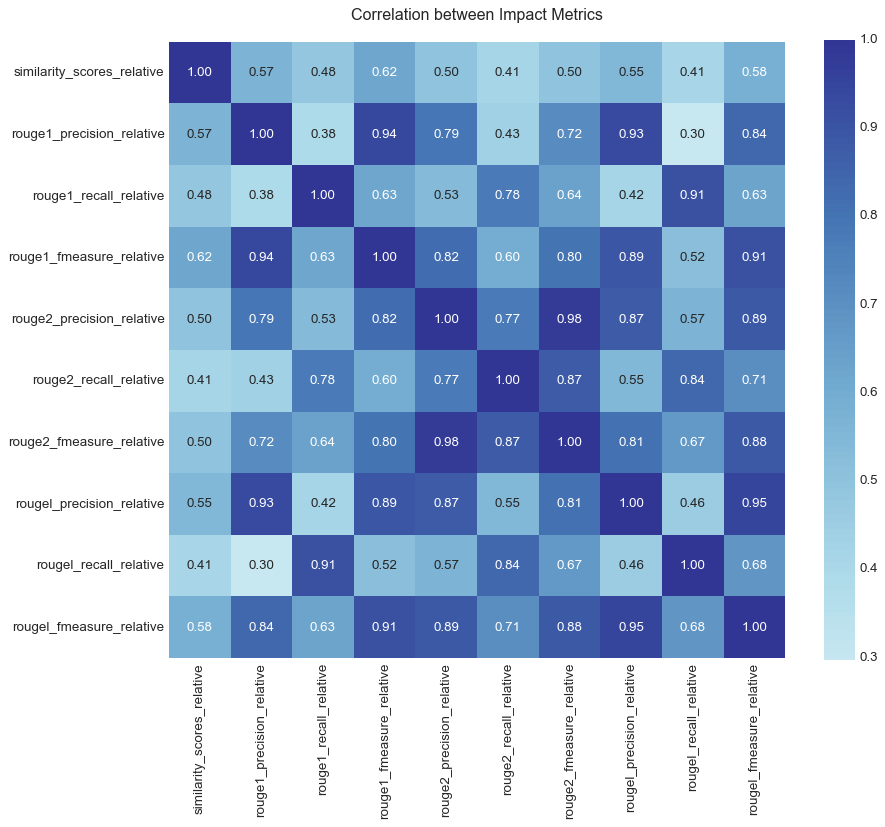

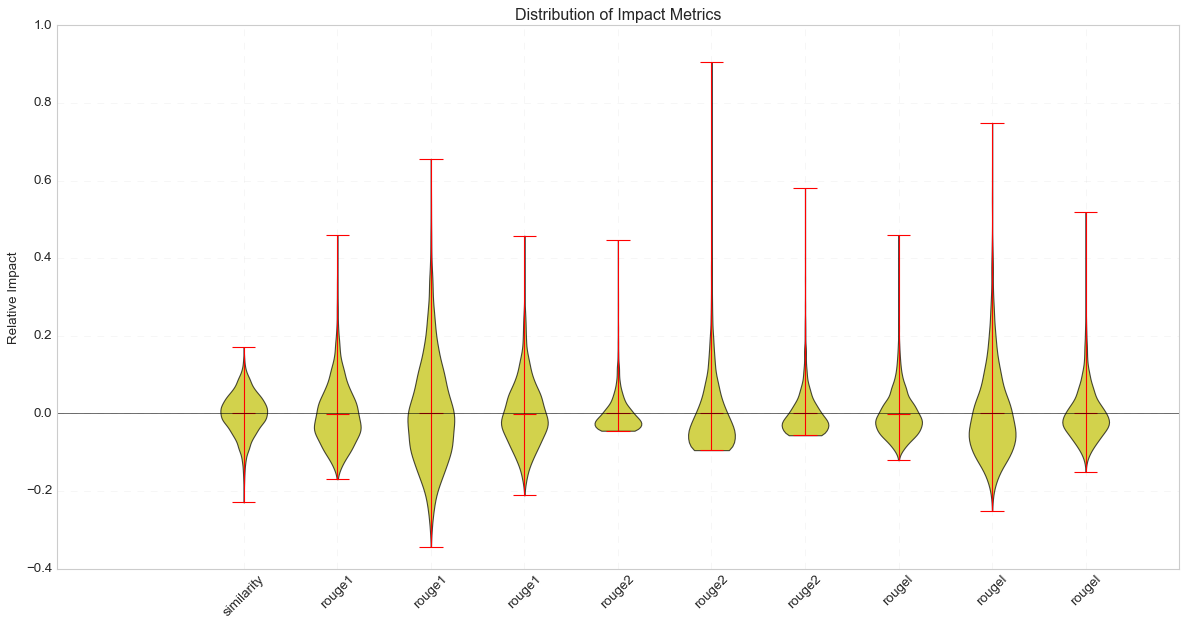

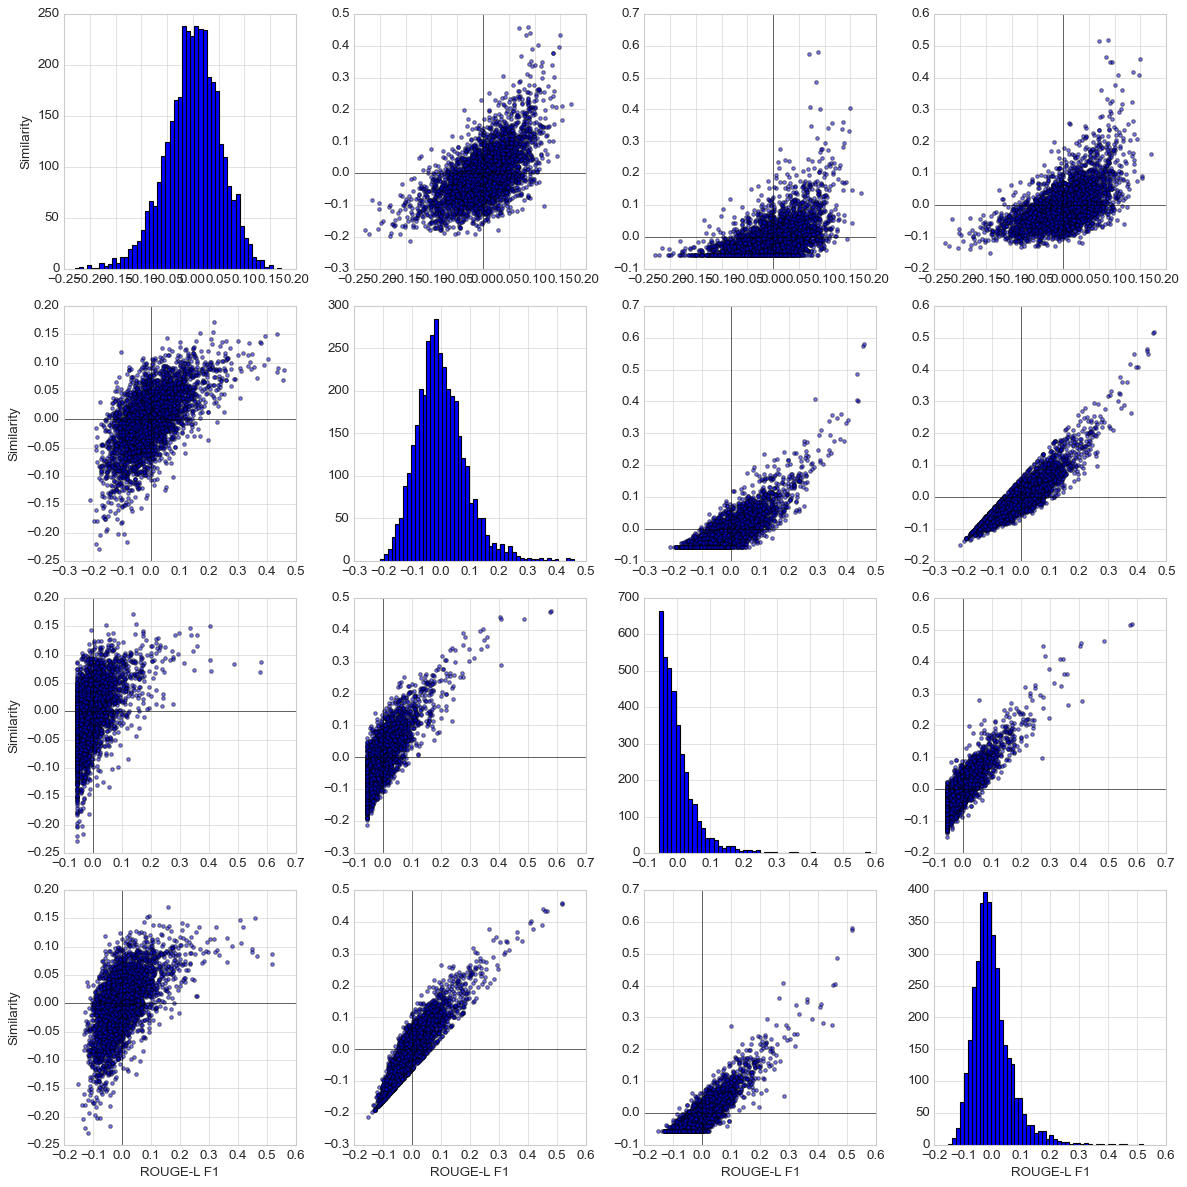


Extreme Impact Analysis:

Number of combinations with high impact (>0.1): 2146

SIMILARITY Metrics:
High impact combinations: 228
Percentage: 6.17%
Maximum absolute impact: 0.2293 (similarity_scores_relative)

ROUGE1 Metrics:
High impact combinations: 1923
Percentage: 52.04%
Maximum absolute impact: 0.6564 (rouge1_recall_relative)

ROUGE2 Metrics:
High impact combinations: 464
Percentage: 12.56%
Maximum absolute impact: 0.9055 (rouge2_recall_relative)

ROUGEL Metrics:
High impact combinations: 1345
Percentage: 36.40%
Maximum absolute impact: 0.7491 (rougel_recall_relative)

Summary Statistics for Key Metrics:
       similarity_scores_relative  rouge1_fmeasure_relative  \
count                 3695.000000               3695.000000   
mean                    -0.000096                 -0.000239   
std                      0.053479                  0.086040   
min                     -0.229300                 -0.211000   
25%                     -0.032200                 -0.057600   
50% 

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List, Dict, Tuple

def load_and_process_data(impact_filepath: str, distribution_filepath: str) -> Tuple[pd.DataFrame, pd.DataFrame]:
    """
    Load both impact and distribution data, combine them if needed.
    """
    # Load impact data
    impact_df = pd.read_csv(impact_filepath)
    distribution_df = pd.read_csv(distribution_filepath)
    
    # Create metric groups
    metric_groups = {
        'similarity': ['similarity_scores_relative'],
        'rouge1': ['rouge1_precision_relative', 'rouge1_recall_relative', 'rouge1_fmeasure_relative'],
        'rouge2': ['rouge2_precision_relative', 'rouge2_recall_relative', 'rouge2_fmeasure_relative'],
        'rougel': ['rougel_precision_relative', 'rougel_recall_relative', 'rougel_fmeasure_relative']
    }
    
    # Calculate absolute impact for each metric
    for metric_list in metric_groups.values():
        for metric in metric_list:
            impact_df[f'{metric}_abs'] = np.abs(impact_df[metric])
    
    return impact_df, distribution_df, metric_groups

def create_correlation_heatmap(data: pd.DataFrame, metric_groups: Dict, save_path: str = None) -> None:
    """
    Create a correlation heatmap for all relative impact metrics.
    """
    # Get all relative impact columns
    relative_metrics = []
    for metrics in metric_groups.values():
        relative_metrics.extend(metrics)
    
    # Calculate correlation matrix
    corr_matrix = data[relative_metrics].corr()
    
    # Create figure
    plt.figure(figsize=(12, 10))
    
    # Create heatmap
    sns.heatmap(corr_matrix, 
                annot=True, 
                cmap='RdYlBu', 
                center=0,
                fmt='.2f',
                square=True)
    
    plt.title('Correlation between Impact Metrics', pad=20)
    plt.tight_layout()
    
    if save_path:
        plt.savefig(f"{save_path}_correlation.png", dpi=300, bbox_inches='tight')
    
    plt.show()

def create_impact_distribution(data: pd.DataFrame, metric_groups: Dict, save_path: str = None) -> None:
    """
    Create violin plots showing the distribution of impacts for each metric.
    """
    # Prepare data for plotting
    plot_data = []
    for group, metrics in metric_groups.items():
        for metric in metrics:
            temp_data = data[metric].copy()
            plot_data.append({
                'metric': group,
                'values': temp_data
            })
    
    # Create figure
    plt.figure(figsize=(15, 8))
    
    # Create violin plots
    positions = range(len(plot_data))
    violins = plt.violinplot([d['values'] for d in plot_data],
                            positions=positions,
                            showmeans=True,
                            showextrema=True)
    
    # Customize violin plots
    for violin in violins['bodies']:
        violin.set_alpha(0.7)
    
    # Add grid and labels
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.ylabel('Relative Impact')
    plt.title('Distribution of Impact Metrics')
    
    # Set x-axis labels
    plt.xticks(positions, [d['metric'] for d in plot_data], rotation=45)
    
    # Add zero line
    plt.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
    
    plt.tight_layout()
    
    if save_path:
        plt.savefig(f"{save_path}_distribution.png", dpi=300, bbox_inches='tight')
    
    plt.show()

def create_scatter_matrix(data: pd.DataFrame, metric_groups: Dict, save_path: str = None) -> None:
    """
    Create a scatter matrix for key metrics.
    """
    # Select one representative metric from each group
    key_metrics = {
        'Similarity': 'similarity_scores_relative',
        'ROUGE-1 F1': 'rouge1_fmeasure_relative',
        'ROUGE-2 F1': 'rouge2_fmeasure_relative',
        'ROUGE-L F1': 'rougel_fmeasure_relative'
    }
    
    # Create scatter matrix
    fig = plt.figure(figsize=(15, 15))
    
    # Create subplot grid
    n_metrics = len(key_metrics)
    for i, (name1, metric1) in enumerate(key_metrics.items()):
        for j, (name2, metric2) in enumerate(key_metrics.items()):
            ax = plt.subplot(n_metrics, n_metrics, i * n_metrics + j + 1)
            
            if i != j:
                # Scatter plot
                ax.scatter(data[metric1], data[metric2], 
                          alpha=0.5, s=10)
                
                # Add zero lines
                ax.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
                ax.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
            else:
                # Histogram on diagonal
                ax.hist(data[metric1], bins=50)
            
            if i == n_metrics - 1:
                ax.set_xlabel(name1)
            if j == 0:
                ax.set_ylabel(name2)
    
    plt.tight_layout()
    
    if save_path:
        plt.savefig(f"{save_path}_scatter_matrix.png", dpi=300, bbox_inches='tight')
    
    plt.show()

def analyze_extreme_impacts(data: pd.DataFrame, metric_groups: Dict, threshold: float = 0.1) -> None:
    """
    Analyze combinations with extreme impacts across metrics.
    """
    print("\nExtreme Impact Analysis:")
    
    # Find combinations with high absolute impact in any metric
    high_impact_mask = pd.Series(False, index=data.index)
    
    for group, metrics in metric_groups.items():
        for metric in metrics:
            high_impact_mask |= (np.abs(data[metric]) > threshold)
    
    high_impact_combinations = data[high_impact_mask]
    
    print(f"\nNumber of combinations with high impact (>{threshold}): {len(high_impact_combinations)}")
    
    # Analyze distribution of high impact combinations across metric groups
    for group, metrics in metric_groups.items():
        group_mask = pd.Series(False, index=data.index)
        for metric in metrics:
            group_mask |= (np.abs(data[metric]) > threshold)
        
        print(f"\n{group.upper()} Metrics:")
        print(f"High impact combinations: {sum(group_mask)}")
        print(f"Percentage: {(sum(group_mask) / len(data) * 100):.2f}%")
        
        if sum(group_mask) > 0:
            # Get the combination with highest absolute impact
            max_impact_idx = data[group_mask][metrics].abs().max().idxmax()
            max_impact_combo = data[group_mask][metrics].abs().max().max()
            print(f"Maximum absolute impact: {max_impact_combo:.4f} ({max_impact_idx})")

def main():
    # Load and process data
    impact_data, distribution_data, metric_groups = load_and_process_data(
        'analysis_impact.csv',
        'analysis_distribution.csv'
    )
    
    # Create visualizations
    create_correlation_heatmap(impact_data, metric_groups, save_path='metric_analysis')
    create_impact_distribution(impact_data, metric_groups, save_path='metric_analysis')
    create_scatter_matrix(impact_data, metric_groups, save_path='metric_analysis')
    
    # Analyze extreme impacts
    analyze_extreme_impacts(impact_data, metric_groups)
    
    # Print summary statistics
    print("\nSummary Statistics for Key Metrics:")
    key_metrics = ['similarity_scores_relative', 'rouge1_fmeasure_relative', 
                  'rouge2_fmeasure_relative', 'rougel_fmeasure_relative']
    print(impact_data[key_metrics].describe())

if __name__ == "__main__":
    main()

# LLM JUDGE 